https://www.nature.com/articles/s42003-020-01476-1

https://www.weizmann.ac.il/sites/3CA/prostate

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [92]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [93]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [94]:
#%matplotlib inline

In [95]:
writeDir = "write/"

fileName = "Dong2020_Prostate"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [96]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [97]:
inDir = 'data/Dong2020_Prostate'
inputCellsFile = f'{inDir}/Cells.csv'
inputMtxFile = f'{inDir}/Exp_data_UMIcounts.mtx'
inputGenesFile = f'{inDir}/Genes.txt'
inMetaFile = f'{inDir}/Meta-data.csv'

In [98]:
adata = sc.read_mtx(inputMtxFile).T
adata

AnnData object with n_obs × n_vars = 21292 × 15709

In [99]:
cells =  pd.read_table(inputCellsFile, delimiter=",", index_col=0)
cells

,sample,cell_type,complexity
cell_name,,,
AAACCTGAGTGTTTGC.1_1,patient #1,Epithelial,2617
AAACCTGCAGTCAGCC.1_1,patient #1,Malignant,4624
AAACCTGGTACATGTC.1_1,patient #1,Malignant,2531
AAACCTGGTCGGCATC.1_1,patient #1,Epithelial,3196
AAACCTGGTGCAGACA.1_1,patient #1,Epithelial,2851
...,...,...,...
TTTGTTGGTTAGAAGT.1_6,patient #6,Malignant,3921
TTTGTTGTCAAACCCA.1_6,patient #6,Malignant,1301
TTTGTTGTCAGACTGT.1_6,patient #6,Malignant,3966


In [100]:
genes =  pd.read_table(inputGenesFile, delimiter=",", index_col=0, header=None)
genes.index.names = ['genes']
genes

""
genes
TSPAN6
DPM1
SCYL3
C1orf112
FGR
...
LINC00891
LINC01144
ADORA3


In [101]:
meta =  pd.read_table(inMetaFile, delimiter=",", index_col=0, header=0)
meta

,technology,n_cells,patient,cancer_type,sex,age,smoking_status,PY,diagnosis_recurrence,disease_extent,...,targeted_rx_response,ICB_exposed,ICB_response,ET_exposed,ET_response,time_end_of_rx_to_sampling,post_sampling_rx_exposed,post_sampling_rx_response,PFS_DFS,OS
sample,,,,,,,,,,,,,,,,,,,,,
patient #1,10x,3022,patient #1,Prostate Cancer,M,82,NaN,NaN,diagnosis,local,...,not exposed,not exposed,not exposed,"Goserelin, bicalutamide",NaN,NaN,NaN,NaN,NaN,NaN
patient #2,10x,950,patient #2,Prostate Cancer,M,82,NaN,NaN,diagnosis,local,...,not exposed,not exposed,not exposed,"Goserelin, bicalutamide",NaN,NaN,NaN,NaN,NaN,NaN
patient #3,10x,965,patient #3,Prostate Cancer,M,86,NaN,NaN,diagnosis,local,...,not exposed,not exposed,not exposed,"Goserelin, bicalutamide",NaN,NaN,NaN,NaN,NaN,NaN
patient #4,10x,1062,patient #4,Prostate Cancer,M,78,NaN,NaN,diagnosis,metastatic,...,not exposed,not exposed,not exposed,bicalutamide,NaN,NaN,NaN,NaN,NaN,NaN
patient #5,10x,8690,patient #5,Prostate Cancer,M,65,NaN,NaN,diagnosis,metastatic,...,not exposed,not exposed,not exposed,bicalutamide\nabiraterone,NaN,NaN,NaN,NaN,NaN,NaN
patient #6,10x,6603,patient #6,Prostate Cancer,M,70,NaN,NaN,diagnosis,metastatic,...,not exposed,not exposed,not exposed,not exposed,not exposed,NaN,NaN,NaN,NaN,NaN


In [103]:
adata.obs = cells
adata.var = genes
adata

AnnData object with n_obs × n_vars = 21292 × 15709
    obs: 'sample', 'cell_type', 'complexity'

In [104]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [105]:
adata.obs 

,sample,cell_type,complexity
cell_name,,,
AAACCTGAGTGTTTGC.1_1,patient #1,Epithelial,2617
AAACCTGCAGTCAGCC.1_1,patient #1,Malignant,4624
AAACCTGGTACATGTC.1_1,patient #1,Malignant,2531
AAACCTGGTCGGCATC.1_1,patient #1,Epithelial,3196
AAACCTGGTGCAGACA.1_1,patient #1,Epithelial,2851
...,...,...,...
TTTGTTGGTTAGAAGT.1_6,patient #6,Malignant,3921
TTTGTTGTCAAACCCA.1_6,patient #6,Malignant,1301
TTTGTTGTCAGACTGT.1_6,patient #6,Malignant,3966


In [106]:
adata.var

""
genes
TSPAN6
DPM1
SCYL3
C1orf112
FGR
...
LINC00891
LINC01144
ADORA3


In [107]:
adata = adata[adata.obs.cell_type=="Malignant"]
adata

View of AnnData object with n_obs × n_vars = 9698 × 15709
    obs: 'sample', 'cell_type', 'complexity'

# QC

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


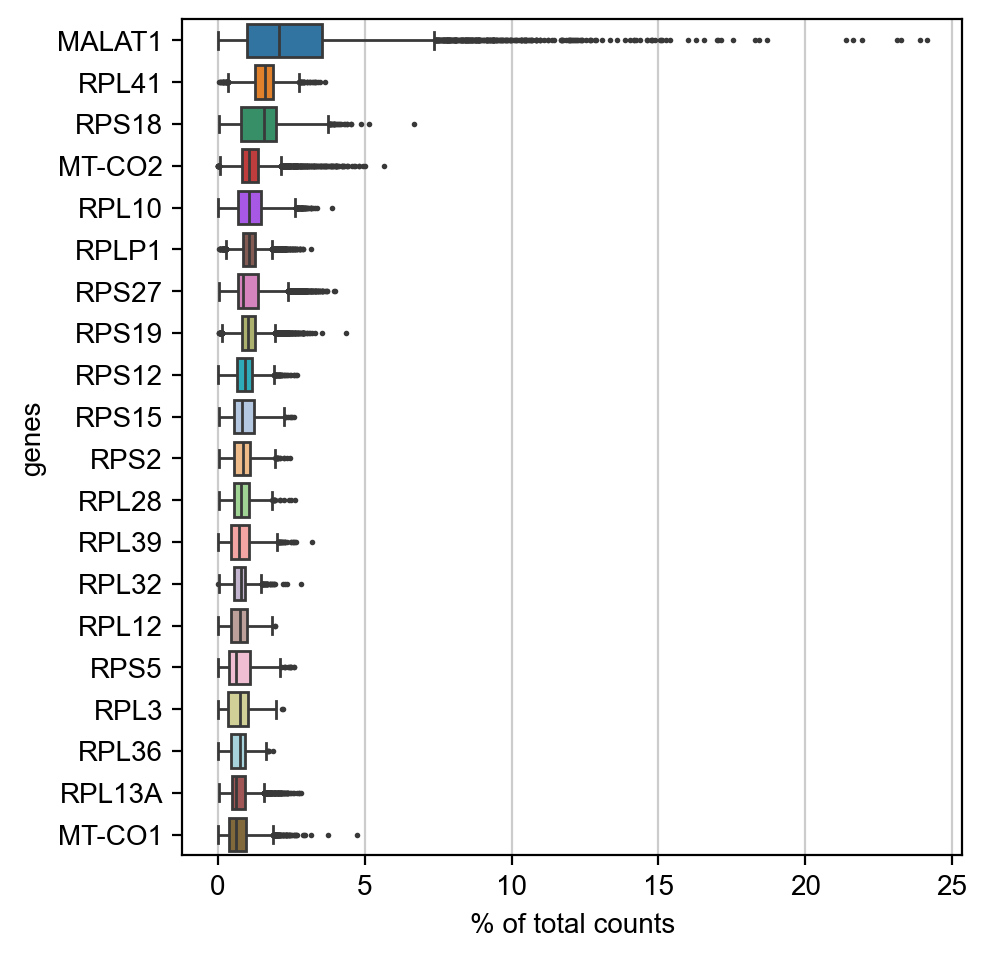

In [108]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_2155393/2962953099.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


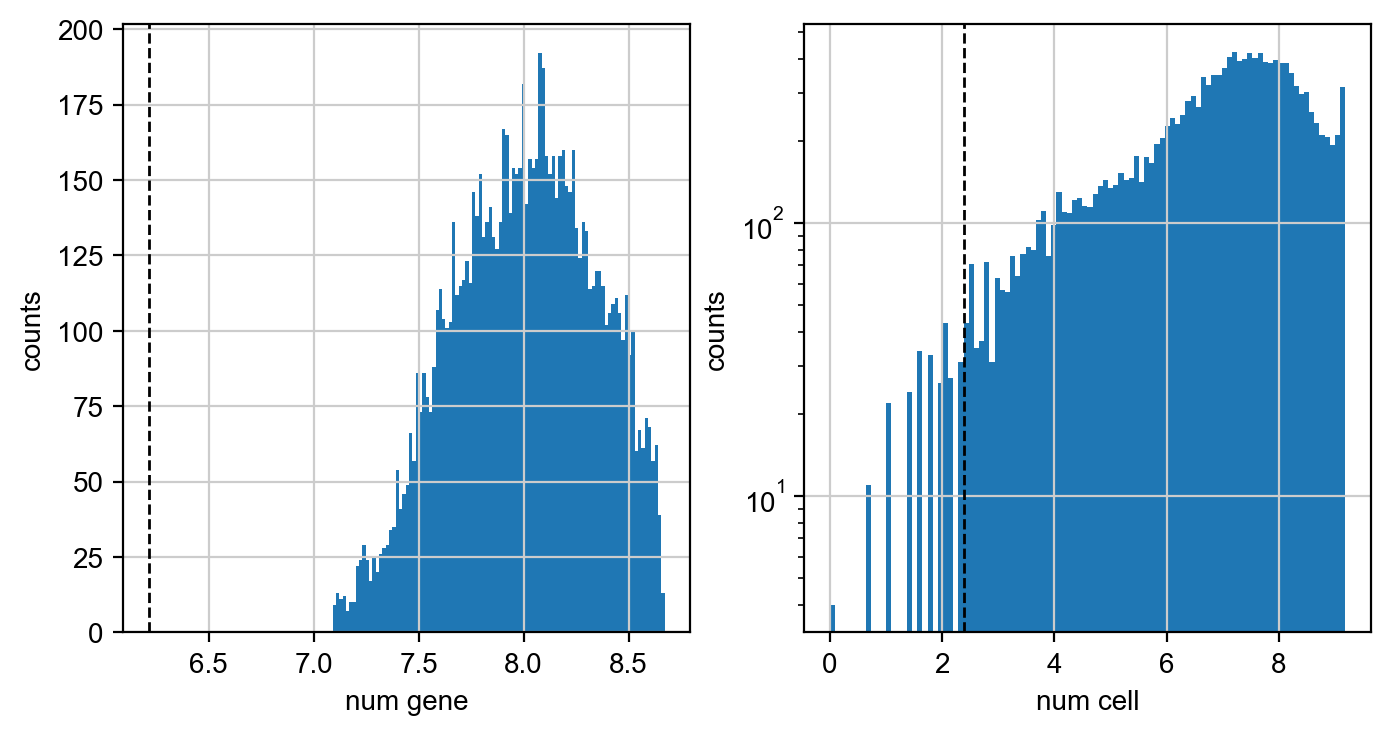

In [109]:
valX = adata.X>0
minGenes=500
minCells=10

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [110]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 255 genes that are detected in less than 10 cells


In [111]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [112]:
for g in adata.var_names:
    if "MT" == g[:2]:
        print(g)

MTMR11
MTA3
MTMR1
MTHFD2
MTFR1
MTIF2
MTMR2
MT3
MTAP
MTMR3
MTHFD1
MTG2
MTHFSD
MTFMT
MTMR9
MTPN
MTPAP
MTMR4
MTCH2
MTRF1L
MTR
MTFR1L
MTHFD1L
MTRF1
MTERF2
MTIF3
MTERF4
MTRR
MT1G
MT2A
MTERF1
MTX2
MTUS1
MTSS1L
MTO1
MTHFS
MTCH1
MTTP
MTMR6
MTF2
MTFR2
MTDH
MTG1
MTA2
MTMR12
MTERF3
MTMR14
MTHFD2L
MTMR10
MTCL1
MT1E
MTSS1
MTM1
MTBP
MTX1
MTHFR
MTX3
MTUS2-AS1
MTURN
MTA1
MT1X
MTF1
MT1F
MT-ND6
MT-CO2
MT-CYB
MT-ND2
MT-ND5
MTOR
MT-CO1
MT-ND3
MT-ND4
MT-ND1
MT-ATP6
MT-CO3
MT1H
MT1A
MT1M
MT-ND4L
MTCP1
MT-ATP8
MTRNR2L4
MTFP1
MTRNR2L8
MTRNR2L10
MTRNR2L3
MTRNR2L1
MTRNR2L12
MTRNR2L6


In [113]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_2155393/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


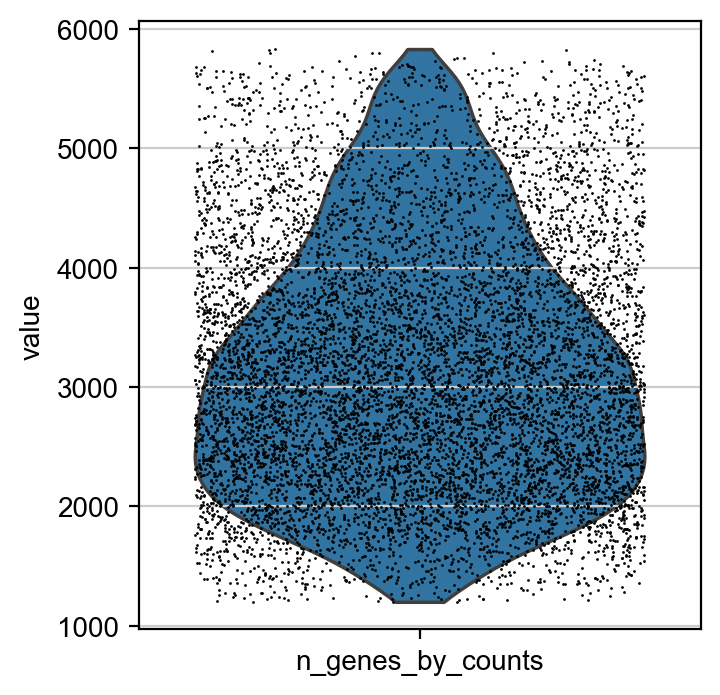

In [114]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


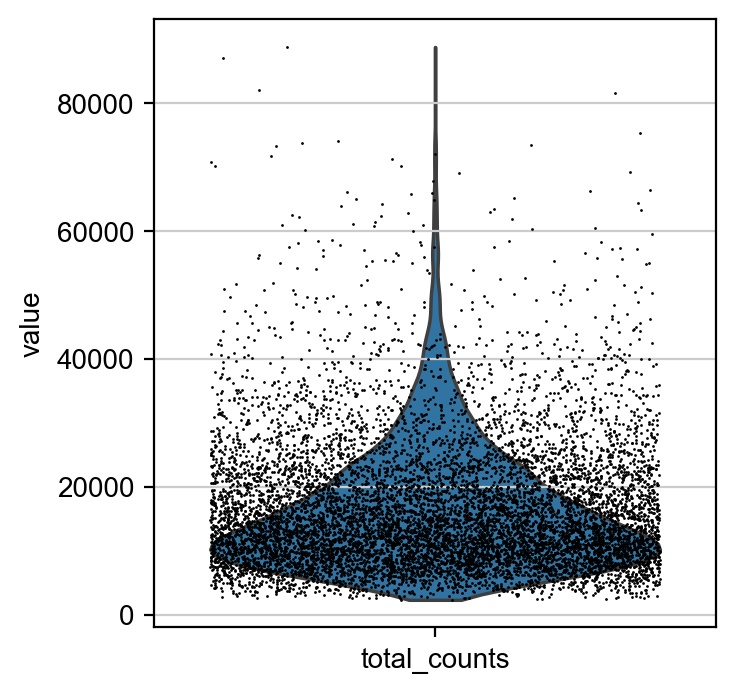

In [115]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


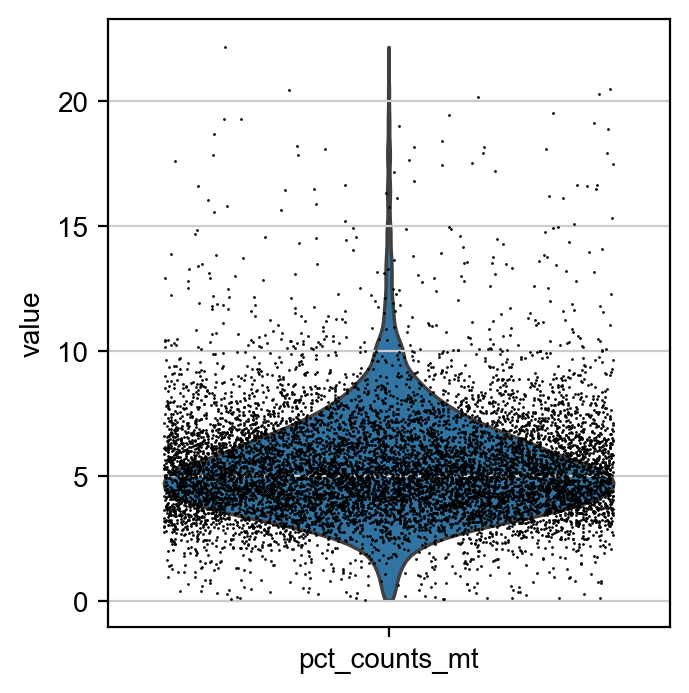

In [116]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

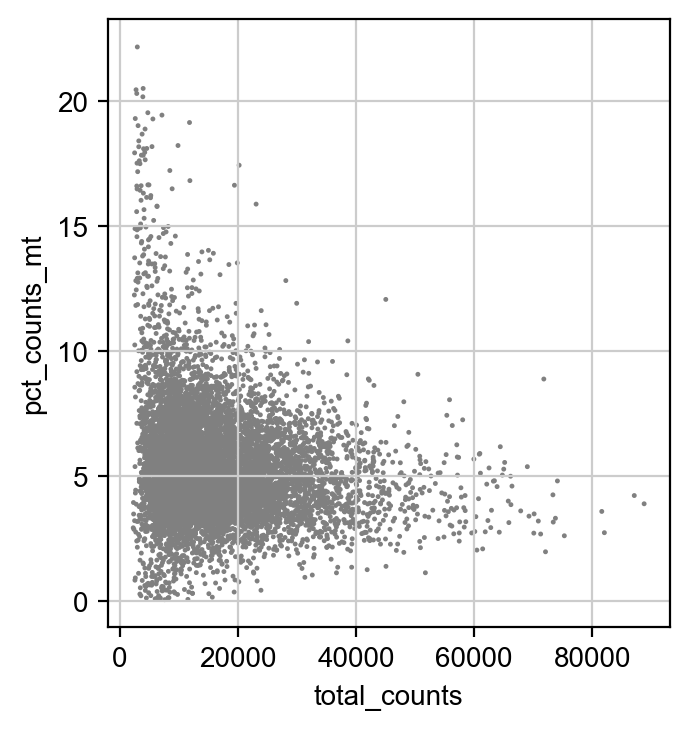

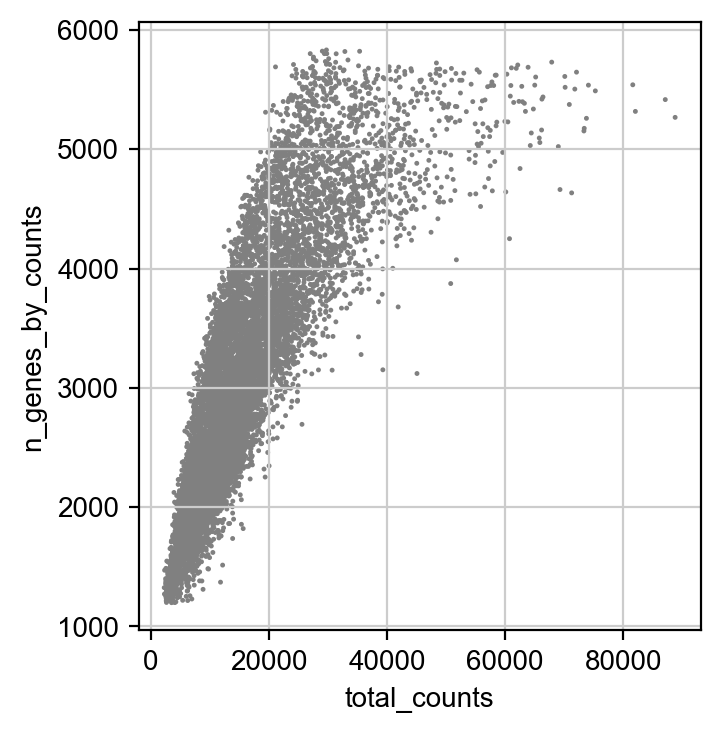

In [117]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [118]:
#adata = adata[adata.obs.n_genes_by_counts < 3000, :]
adata = adata[adata.obs.total_counts < 35000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

save post QC scanpy

In [119]:
adata

View of AnnData object with n_obs × n_vars = 8903 × 15453
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [120]:
resultsFileQC

'write/Dong2020_Prostate_QC.h5ad'

In [121]:
adata.write(resultsFileQC)

# Analysis

In [122]:
resultsFile = writeDir + fileName + '.h5ad'      
resultsFileQC = writeDir + fileName + '_QC.h5ad'

In [123]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [124]:
adata = sc.read(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 8903 × 15453
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [125]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [126]:
sc.pp.log1p(adata)

In [127]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


1635


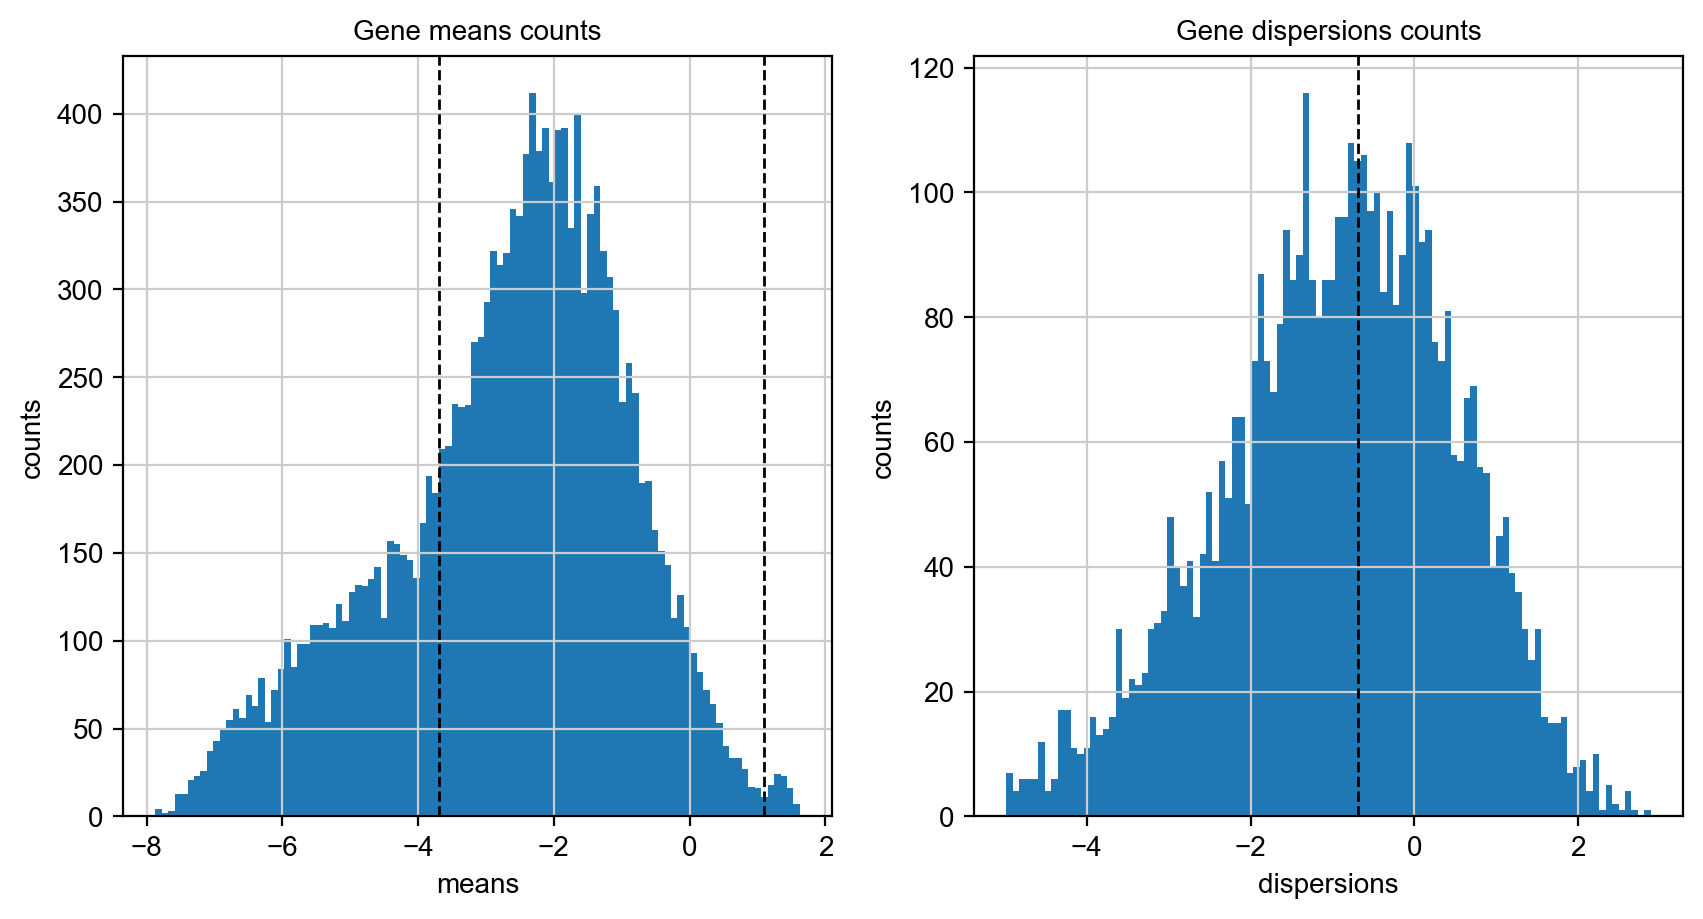

In [128]:
minMean = 0.025
maxMean = 3
minDisp = 0.5

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

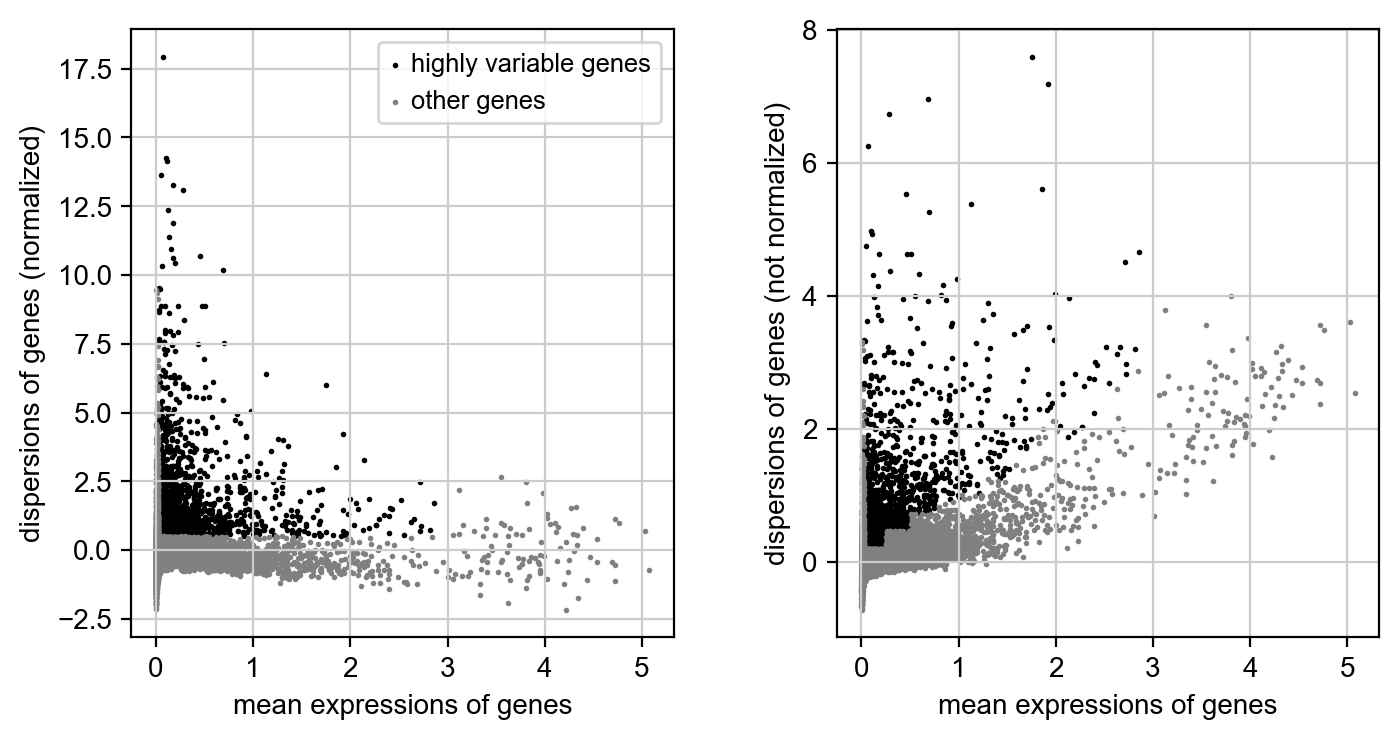

In [129]:
sc.pl.highly_variable_genes(adata)

In [130]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [131]:
adata.raw = adata

In [132]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [133]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [134]:
#sc.pp.scale(adata, max_value=10)

In [135]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:01)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


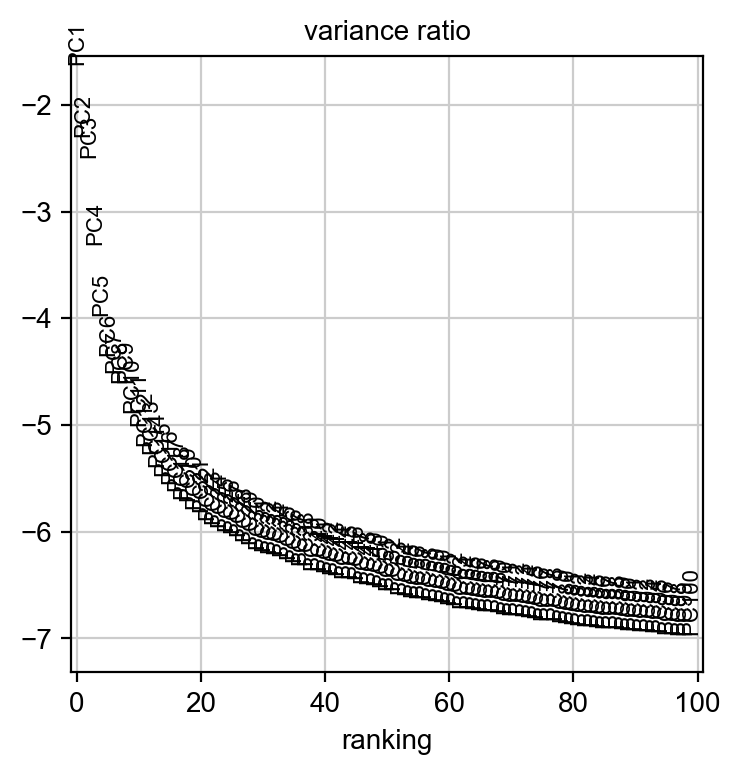

In [136]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

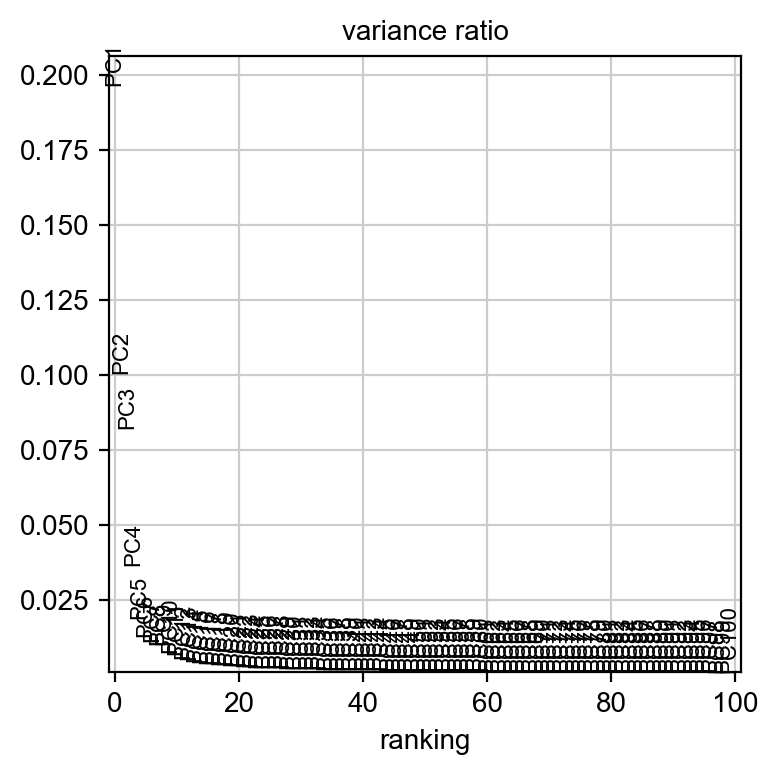

In [137]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [138]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [139]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [140]:
sc.tl.leiden(adata, resolution=0.25)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [142]:
adata.obs["patient"] = [str(s) for s in adata.obs["sample"]]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

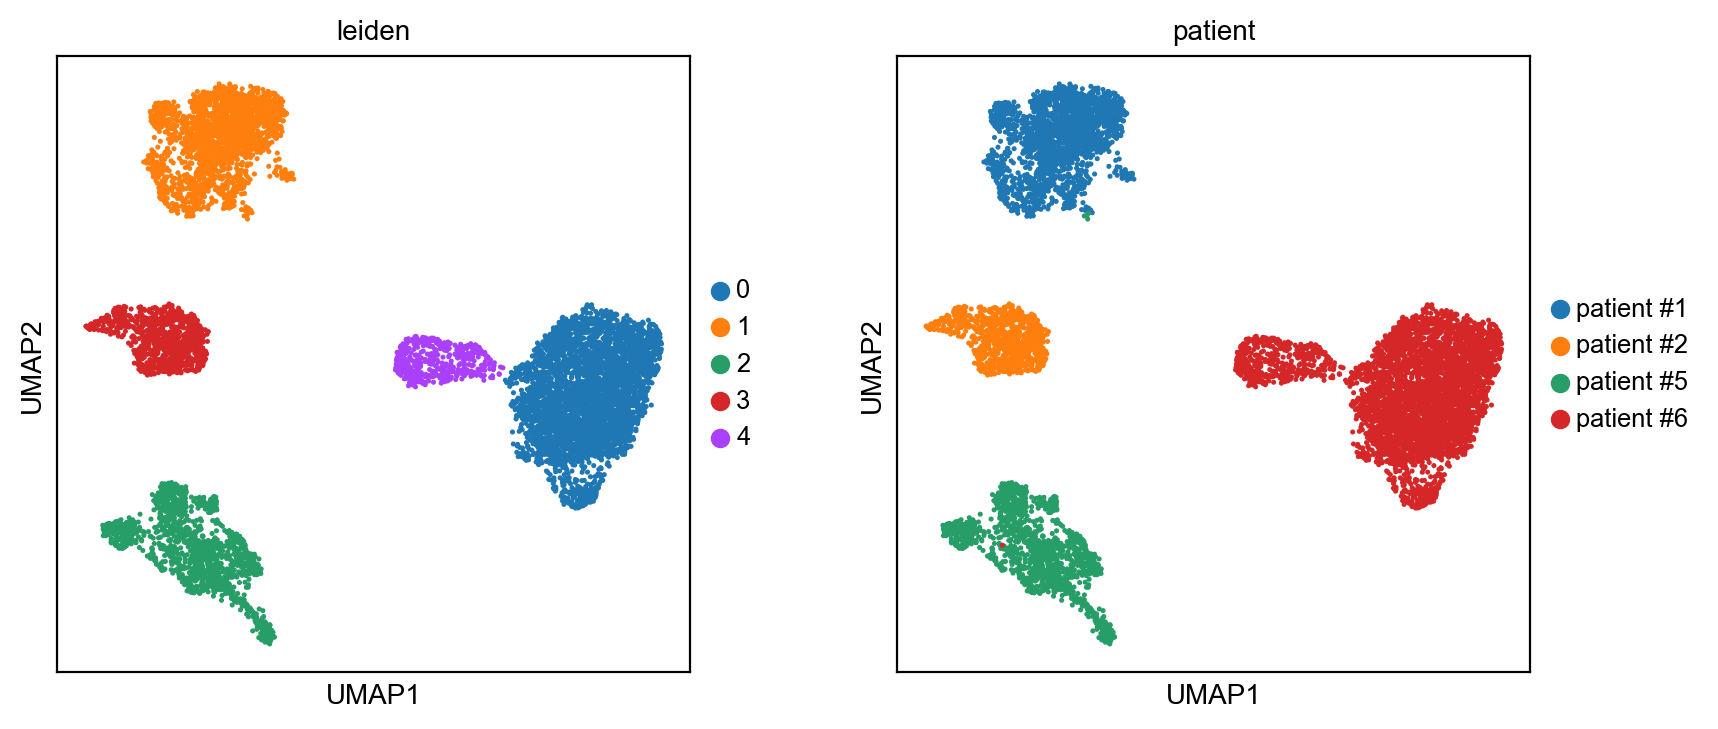

In [143]:
sc.pl.umap(adata, color=["leiden","patient"],ncols=2)

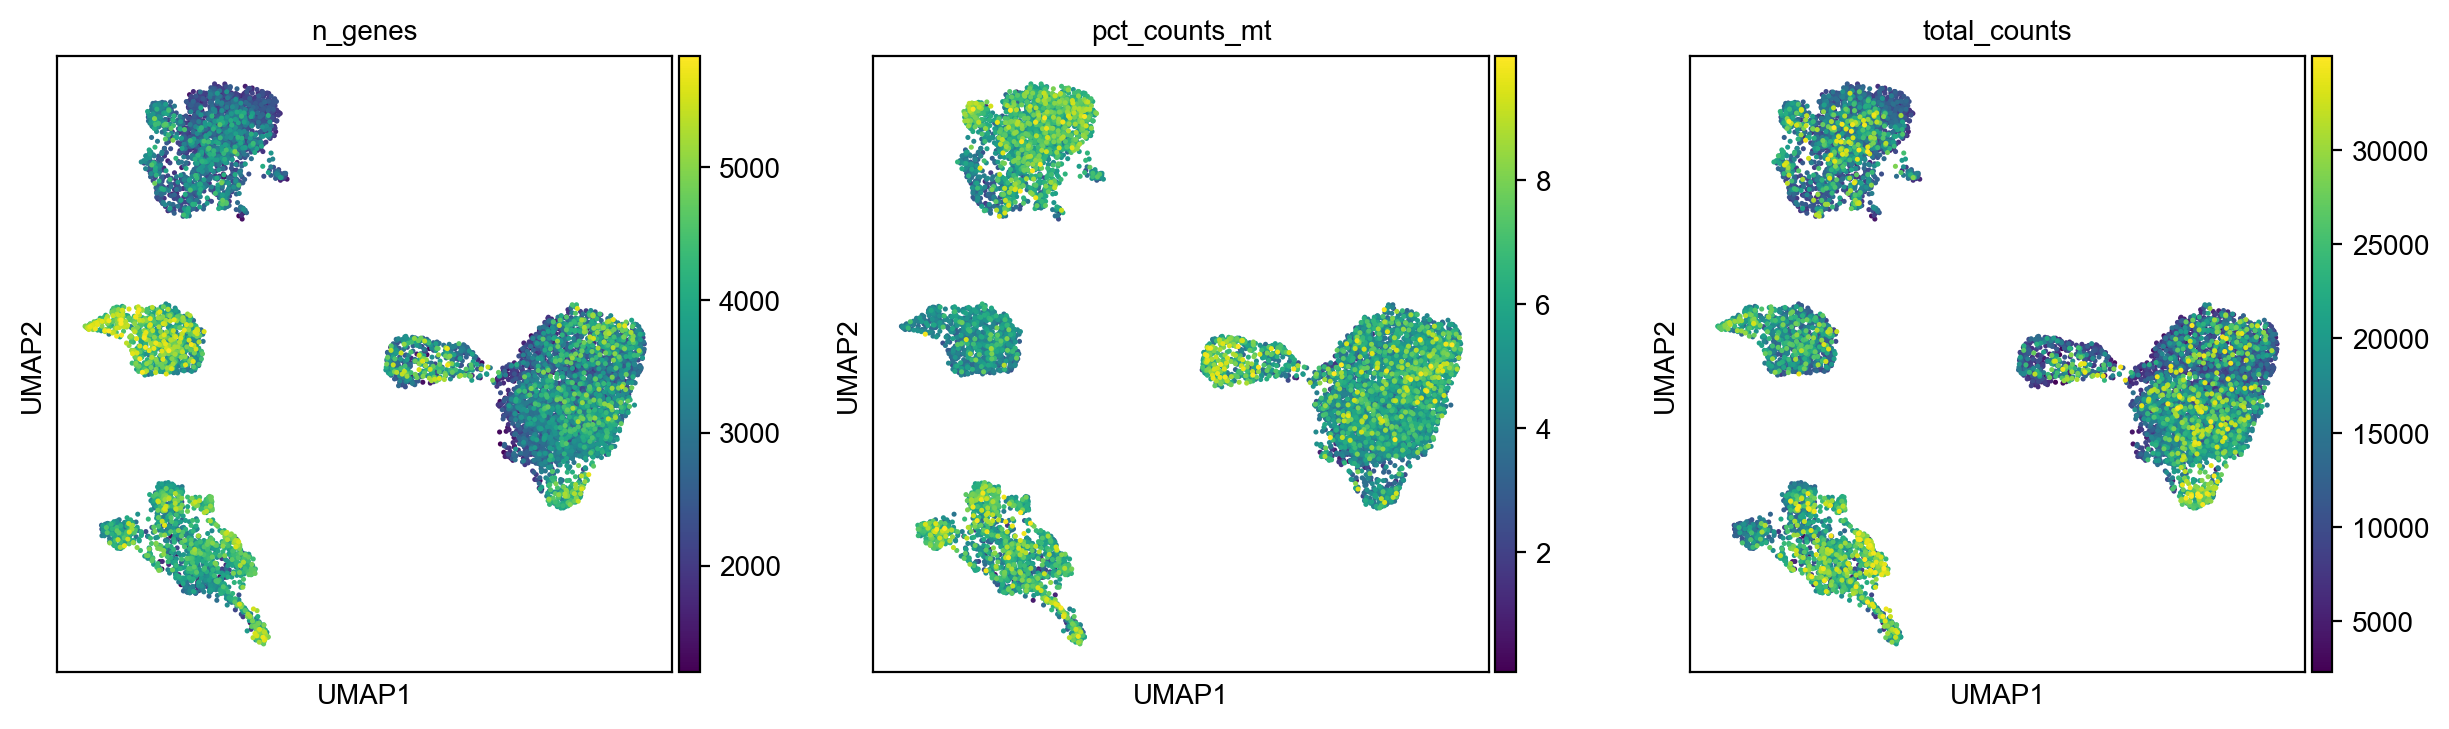

In [144]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

ranking genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


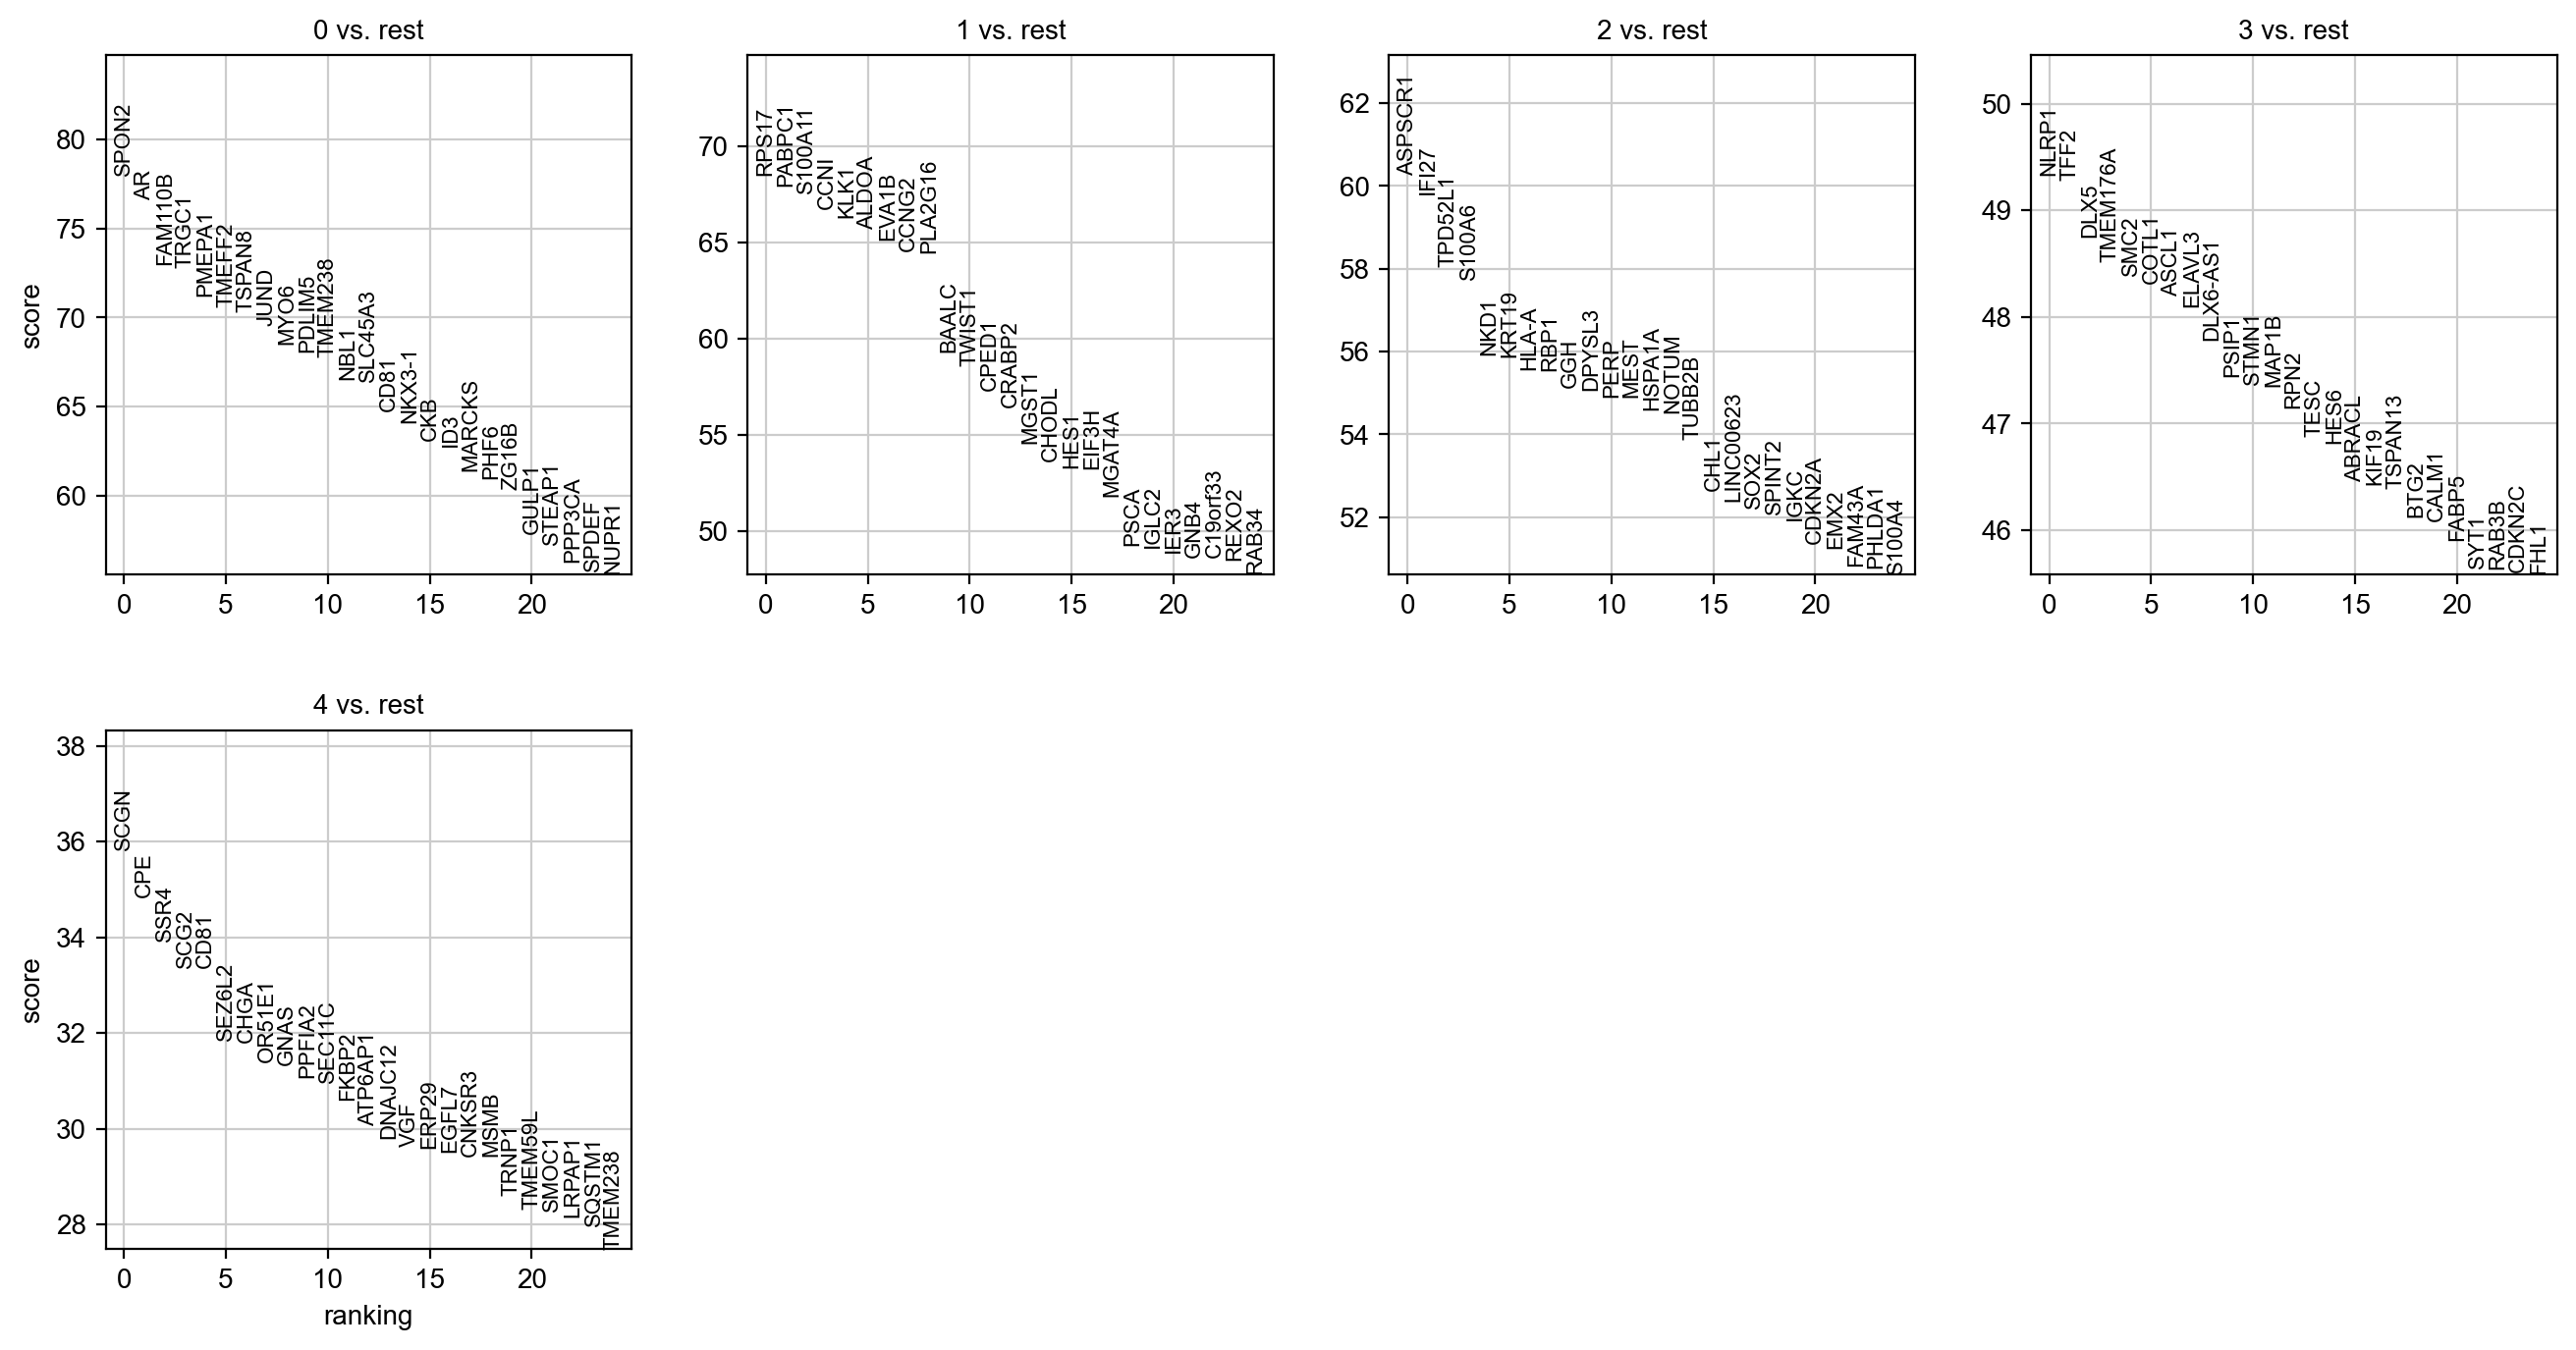

In [145]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [146]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

,0,1,2,3,4
0,SPON2,RPS17,ASPSCR1,NLRP1,SCGN
1,AR,PABPC1,IFI27,TFF2,CPE
2,FAM110B,S100A11,TPD52L1,DLX5,SSR4
3,TRGC1,CCNI,S100A6,TMEM176A,SCG2
4,PMEPA1,KLK1,NKD1,SMC2,CD81
5,TMEFF2,ALDOA,KRT19,COTL1,SEZ6L2
6,TSPAN8,EVA1B,HLA-A,ASCL1,CHGA
7,JUND,CCNG2,RBP1,ELAVL3,OR51E1
8,MYO6,PLA2G16,GGH,DLX6-AS1,GNAS
9,PDLIM5,BAALC,DPYSL3,PSIP1,PPFIA2


    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

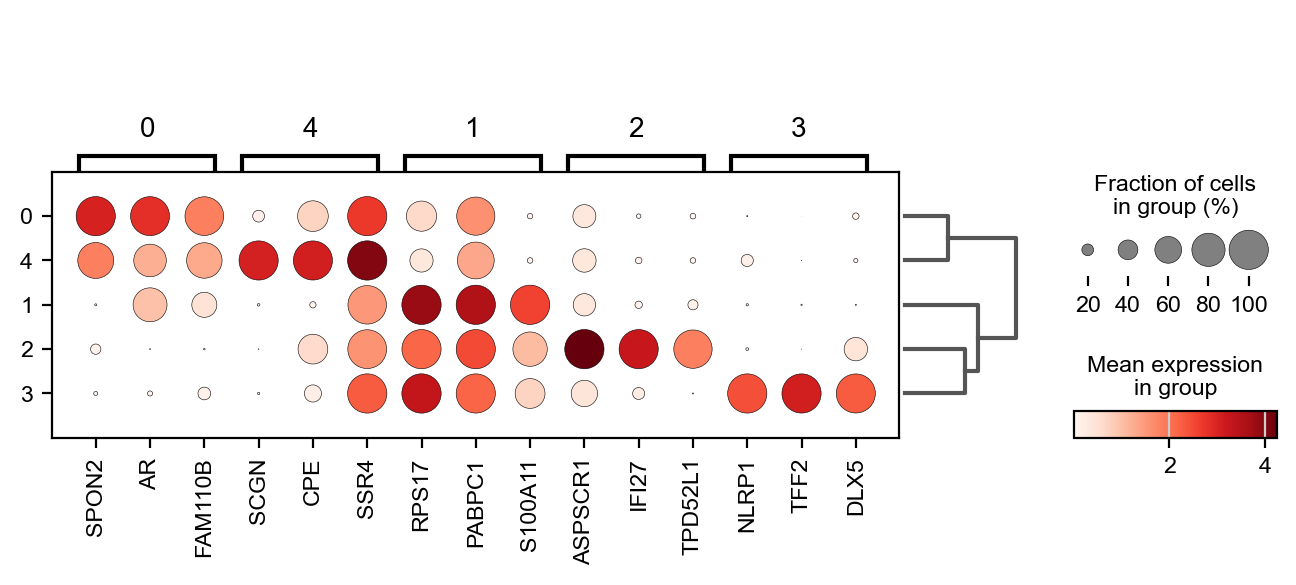

In [147]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [148]:
sigFile = "geneSigs/simpLUADcs.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["HPCS"]

In [149]:
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score")

computing score 'HPCS_score'
    finished: added
    'HPCS_score', score of gene set (adata.obs).
    1129 total control genes are used. (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

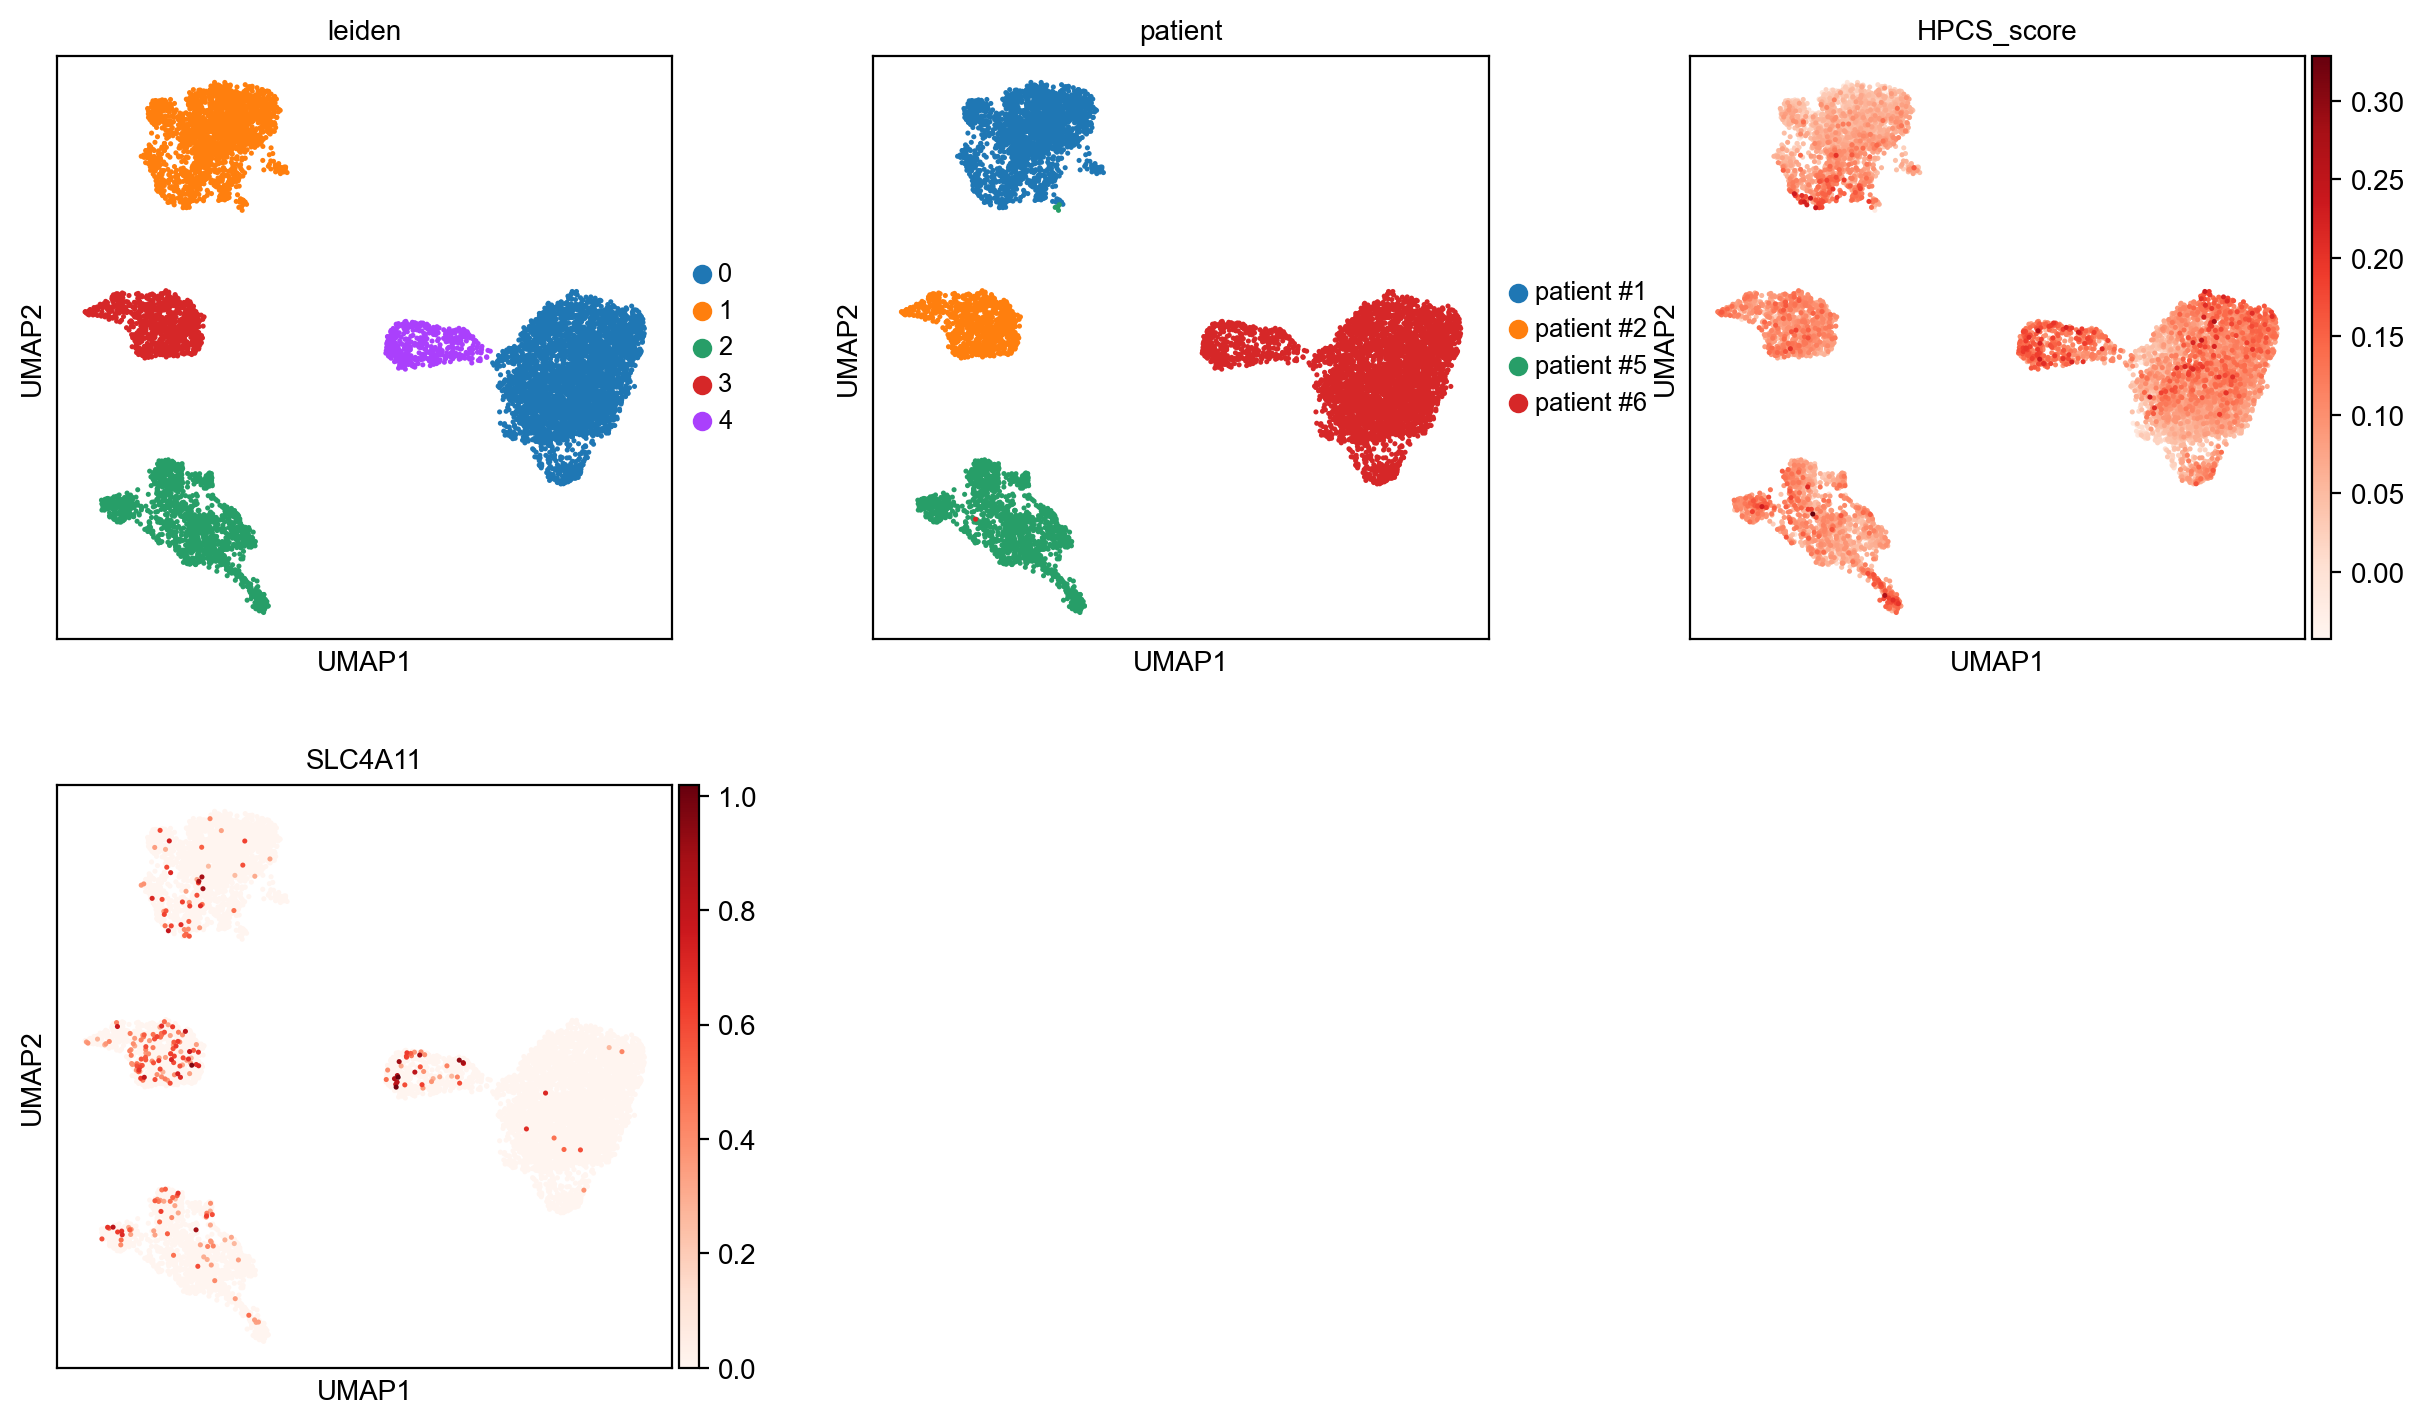

In [150]:
sc.pl.umap(adata, color=["leiden","patient","HPCS_score","SLC4A11"],ncols=3, cmap="Reds")

In [ ]:
sc.pl.umap(adata, color=["leiden","patient","HPCS_score","PLAUR", "SLC4A11"],ncols=3, cmap="Reds")

In [152]:
resultsFile

'write/Dong2020_Prostate.h5ad'

In [153]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 8903 × 1635
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'patient', 'HPCS_score'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'patient_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'